In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os

dir_current = globals()['_dh'][0]
dir_TNGcube = dir_current+'/../'

sys.path.append(dir_TNGcube)

from queryTNG import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
baseURL

'http://www.tng-project.org/api/'

## Find snapNum given redshift

In [3]:
snapNum = get_snapNum(redshift=0.35, simName='TNG50-1', baseURL=baseURL)
snapNum

75

## QueryTNG

In [4]:
QTNG = QueryTNG(simName='TNG50-1', snapNum=75)

In [5]:
QTNG.simInfo

{'name': 'TNG50-1',
 'description': 'Main high-resolution IllustrisTNG50 run including the full TNG physics model.',
 'name_alt': 'L35n2160TNG',
 'boxsize': 35000.0,
 'z_start': 127.0,
 'z_final': 0.0,
 'cosmology': 'Planck2015',
 'omega_0': 0.3089,
 'omega_L': 0.6911,
 'omega_B': 0.0486,
 'hubble': 0.6774,
 'physics_model': 'Fiducial TNG Model',
 'has_cooling': True,
 'has_starformation': True,
 'has_winds': True,
 'has_blackholes': True,
 'mass_gas': 5.73879e-06,
 'mass_dm': 3.07367708626464e-05,
 'softening_dm_comoving': 0.39,
 'softening_stars_comoving': 0.39,
 'softening_blackholes_comoving': 0.39,
 'softening_gas_comoving': 0.39,
 'softening_dm_max_phys': 0.195,
 'softening_stars_max_phys': 0.195,
 'softening_blackholes_max_phys': 0.39,
 'softening_gas_max_phys': 0.195,
 'softening_gas_factor': 2.5,
 'softening_gas_comoving_min': 0.05,
 'num_dm': 10077696000,
 'num_tr_mc': 10077696000,
 'num_tr_vel': 0,
 'longids': True,
 'is_uniform': True,
 'is_zoom': False,
 'is_subbox': False

In [7]:
QTNG.snapInfo

{'simulation': 'http://www.tng-project.org/api/TNG50-1/',
 'number': 75,
 'redshift': 0.347853841858178,
 'num_gas': 8862163389,
 'num_dm': 10077696000,
 'num_trmc': 10077696000,
 'num_stars': 1102338034,
 'num_bhs': 4056,
 'num_groups_fof': 10537931,
 'num_groups_subfind': 6077258,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1077235079036.0,
 'filesize_groupcat': 6646750894.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/',
 'subhalos': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http://www.tng-proj

## Query subhalo IDs given certain condiction

In [33]:
# try different pageID to show subhalos with larger IDs
subhaloIDs = QTNG.query_subhaloCat(mass_min=1e10, vmax_min=50., limit=20, pageID=0)
subhaloIDs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### - use .subhaloCat to quickly view some properties subjected to subhaloIDs

In [9]:
QTNG.subhaloCat['results']

[{'id': 10,
  'sfr': 0.0104922,
  'mass_log_msun': 11.611495015673922,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/10/'},
 {'id': 11,
  'sfr': 9.23384,
  'mass_log_msun': 11.53474760963499,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/11/'},
 {'id': 12,
  'sfr': 0.00174182,
  'mass_log_msun': 11.60288144996208,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/12/'},
 {'id': 13,
  'sfr': 0.0,
  'mass_log_msun': 11.593184980774321,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/13/'},
 {'id': 14,
  'sfr': 1.87598,
  'mass_log_msun': 11.402084879983855,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/14/'}]

### - use .query_subhaloInfo to check detail properties subjected to the input subhaloID

In [26]:
subhaloInfo = QTNG.query_subhaloInfo(28)
subhaloInfo

{'snap': 75,
 'id': 28,
 'mass': 8.75132,
 'stellarphotometrics_r': -20.2152,
 'vmax': 144.978,
 'vmaxrad': 4.4221,
 'mass_log_msun': 11.111228372197086,
 'cm': [6690.44, 24822.7, 20579.1],
 'pos': [6690.79, 24822.8, 20579.2],
 'spin': [4.01503, 73.7088, 88.7172],
 'vel': [100.091, 309.348, 418.109]}

## Download subhalo info and its associated snapshot partical information

In [11]:
subhaloInfos = QTNG.download_subhalos(subhaloIDs=[5, 46])

http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/5/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/46/cutout.hdf5


In [35]:
subhaloInfos[5]

{'snap': 75,
 'id': 5,
 'mass': 35.6889,
 'stellarphotometrics_r': -22.4867,
 'vmax': 283.493,
 'vmaxrad': 0.9171,
 'mass_log_msun': 11.721687970068674,
 'cm': [7739.12, 23895.2, 21038.5],
 'pos': [7738.81, 23896.9, 21039.0],
 'spin': [891.815, 168.882, -535.061],
 'vel': [-978.982, 702.392, 233.789],
 'snapInfo': {'gas': {'pos': array([[  0.95861328,  -0.10234375,   1.21289062],
          [ -0.2059375 ,   1.0265625 ,   1.53515625],
          [  0.47960938,   0.88203125,   2.09960938],
          ...,
          [ 23.07775391, -46.69023438,  -8.3984375 ],
          [-28.0965625 ,  16.14570312, -31.2890625 ],
          [ 22.27257813,   7.19453125,  48.64648438]]),
   'vel': array([[-108.46002  ,   44.68518  , -186.83185  ],
          [-222.00458  ,   61.924377 , -245.90671  ],
          [-159.92682  ,  -96.53552  , -215.48111  ],
          ...,
          [  -6.9000854,   62.9953   ,  -64.5336   ],
          [  -2.9822998,   90.25006  ,  161.58655  ],
          [ 202.0628   , -131.09778  ,

In [16]:
subhaloInfo['spin']

[-96.1246, -11.3787, -158.723]

# Plots

In [27]:
subhaloInfo = pickle.load(open('cutout_46.pkl', 'rb'))

print('stellarphotometrics_r:', subhaloInfo['stellarphotometrics_r'])
print('vmax:', subhaloInfo['vmax'])
print('vmaxrad:', subhaloInfo['vmaxrad'])

print('spin:', subhaloInfo['spin'])
print('tot. spin mag.:', np.linalg.norm(np.array(subhaloInfo['spin'])))

stellarphotometrics_r: -19.0875
vmax: 94.5006
vmaxrad: 9.9715
spin: [-96.1246, -11.3787, -158.723]
tot. spin mag.: 185.90966695642808


In [28]:
pos_label = {0:'$\Delta x$ [ckpc/h]', 1: '$\Delta y$ [ckpc/h]', 2:'$\Delta z$ [ckpc/h]'}
vel_label = {0:'$v_x$ [km/s]', 1: '$v_y$ [km/s]', 2:'$v_z$ [km/s]'}
image_npix = 151
D_x = 15.
spec_npix = 51
D_v = 130.
bins_pos = np.linspace(-D_x, D_x, image_npix)
bins_vel = np.linspace(-D_v, D_v, spec_npix)

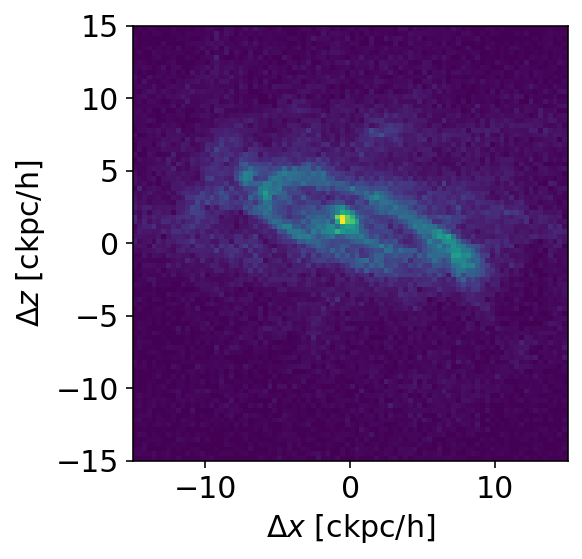

In [29]:
idx = 0
idy = 2
ptlType='gas'

bins_pos = np.linspace(-D_x, D_x, 91)

pos = subhaloInfo['snapInfo'][ptlType]['pos']
mass = subhaloInfo['snapInfo'][ptlType]['mass']
ptl2D, x_edg, y_edg, _   = plt.hist2d(pos[:,idx], pos[:,idy], weights=mass, bins=bins_pos)


plt.rc('font', size=15)
plt.xlabel(pos_label[idx])
plt.ylabel(pos_label[idy])
#plt.title(ptlType)
plt.axis('square')
plt.savefig('spiral.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'gas')

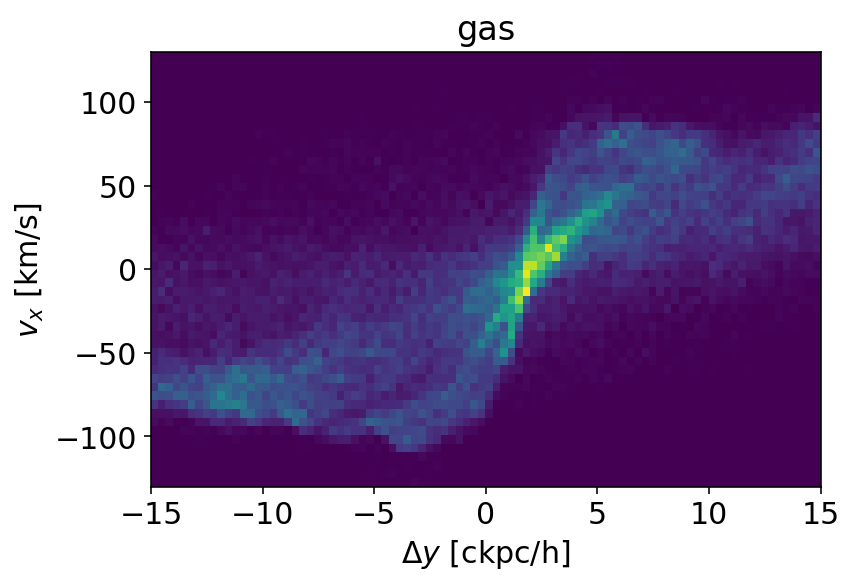

In [20]:
id_pos = 1
id_vel = 0
ptlType='gas'

pos = subhaloInfo['snapInfo'][ptlType]['pos']
mass = subhaloInfo['snapInfo'][ptlType]['mass']
vel = subhaloInfo['snapInfo'][ptlType]['vel']

bary2D, x_edg, y_edg, _   = plt.hist2d(pos[:,id_pos], vel[:,id_vel], weights=mass, bins=(bins_pos, bins_vel))

plt.rc('font', size=14)
plt.xlabel(pos_label[id_pos])
plt.ylabel(vel_label[id_vel])
plt.title(ptlType)

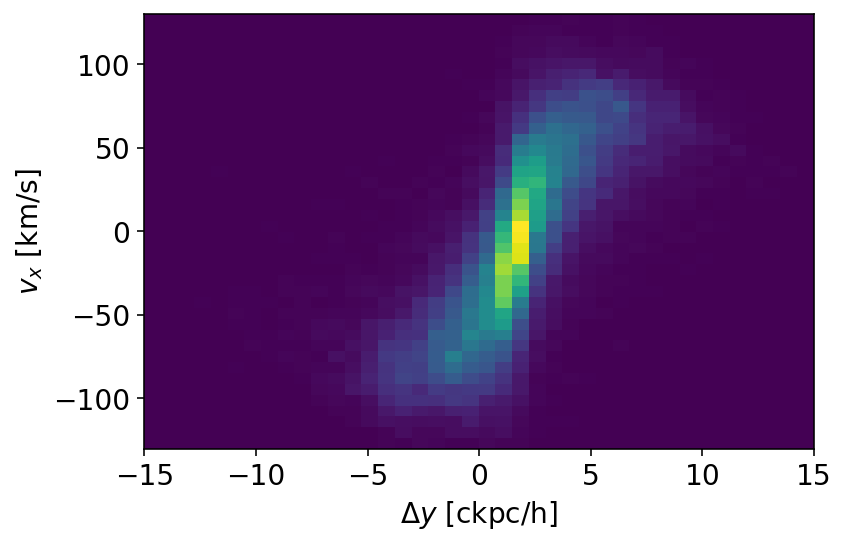

In [21]:
id_pos = 1
id_vel = 0
ptlType='stars'

bins_pos = np.linspace(-D_x, D_x, 41)
bins_vel = np.linspace(-D_v, D_v, 41)

pos = subhaloInfo['snapInfo'][ptlType]['pos']
mass = subhaloInfo['snapInfo'][ptlType]['mass']
vel = subhaloInfo['snapInfo'][ptlType]['vel']

bary2D, x_edg, y_edg, _   = plt.hist2d(pos[:,id_pos], vel[:,id_vel], weights=mass, bins=(bins_pos, bins_vel))

plt.rc('font', size=16)
plt.xlabel(pos_label[id_pos])
plt.ylabel(vel_label[id_vel])
#plt.title(ptlType)
plt.savefig('spec.pdf',bbox_inches='tight')